In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
sns.set()
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
%matplotlib inline

In [54]:
cancer_df = pd.read_csv("C:\\Users\\HARI\\Downloads\\cancer.csv")

In [55]:
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [56]:
cancer_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [57]:
cancer_df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [9]:
cancer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [10]:
cancer_df.isnull().any().any()

False

In [11]:
cancer_df['diagnosis']= cancer_df['diagnosis'].map({'M':1,'B':0})

In [12]:
M = cancer_df[(cancer_df['diagnosis'] != 0)]
B = cancer_df[(cancer_df['diagnosis'] == 0)]

In [13]:
def plots(column, bin_size) :  
    temp1 = M[column]
    temp2 = B[column]
    
    hist_data = [temp1, temp2]
    
    group_labels = ['Malignant', 'Benign']
    colors = ['purple', 'pink']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = bin_size, curve_type='kde')
    
    fig['layout'].update(title = column)
    fig.show()

In [14]:
plots('radius_mean', .5)
plots('texture_mean', .5)
plots('perimeter_mean',5)
plots('area_mean',15)

In [15]:
plots('radius_se', .1)
plots('texture_se', .1)
plots('perimeter_se', .5)
plots('area_se', 5)

In [16]:
plots('radius_worst', .5)
plots('texture_worst', .5)
plots('perimeter_worst', 5)
plots('area_worst', 10)

<AxesSubplot:xlabel='area_mean', ylabel='smoothness_mean'>

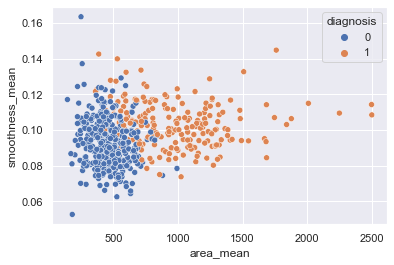

In [17]:
sns.scatterplot(x='area_mean',y='smoothness_mean',hue='diagnosis',data=cancer_df)

In [18]:
features = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [19]:
X =cancer_df.iloc[:,1:32].values
y =cancer_df['diagnosis']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=22,stratify=y)

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [22]:
model = SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(kernel='linear')

In [23]:
y_pred = model.predict(X_test)

<AxesSubplot:>

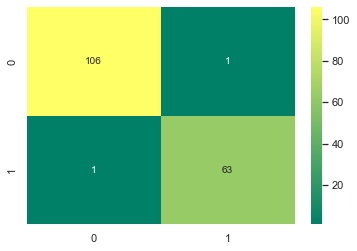

In [24]:
cnf = confusion_matrix(y_test,y_pred)
sns.heatmap(cnf,annot=True,cmap='summer',fmt='g')

In [25]:
param_grid={'C':[0.1,1,10,100,1000],
            'gamma':[1,0.1,0.01,0.001,0.0001],
            'kernel':['rbf']}

In [26]:
grid= GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.938 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.924 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.949 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.950 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.963 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.925 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.924 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.962 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.950 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.938 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.950 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.962 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/5] END ...C=1000, gamm

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=4)

In [27]:
grid.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [28]:
grid.best_score_

0.9749367088607596

In [29]:
g_pred = grid.predict(X_test)

<AxesSubplot:>

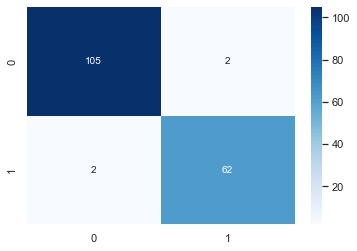

In [30]:
g_cnf = confusion_matrix(y_test,g_pred)
sns.heatmap(g_cnf,annot=True,fmt='g',cmap='Blues')

In [31]:
g_acc = accuracy_score(y_test,g_pred)
print("Accuracy with GridSearch:",g_acc)

Accuracy with GridSearch: 0.9766081871345029


In [32]:
print(classification_report(y_test,g_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       107
           1       0.97      0.97      0.97        64

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [33]:
coef= model.coef_
coeffs = np.squeeze(coef)
coeffs

array([ 0.23463524, -0.02721934,  0.26579436,  0.26177093,  0.04181737,
       -0.4698767 ,  0.63301254,  0.39352156,  0.31430033, -0.2808655 ,
        0.70316845, -0.27917949,  0.21223191,  1.10398539,  0.39494297,
       -0.5604031 , -0.10315375,  0.37468872, -0.17339705, -0.71163786,
        0.59167568,  1.09187142,  0.49122216,  0.8525706 ,  0.19158561,
        0.01121302,  0.66293921,  0.35053975,  0.29471587,  0.9004685 ])

In [34]:
coefs = pd.DataFrame({"Features":features,"Coefficients":coeffs})
feature_imp = coefs.sort_values(by='Coefficients',ascending=False)

<AxesSubplot:xlabel='Coefficients', ylabel='Features'>

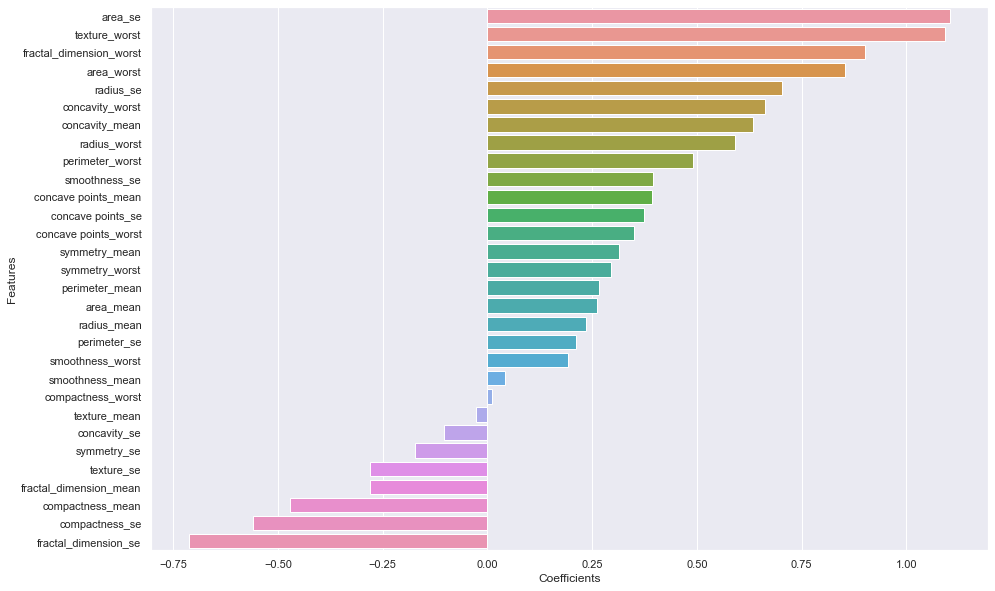

In [35]:
plt.figure(figsize=(15,10))
sns.barplot(y='Features',x='Coefficients',data=feature_imp)